In [92]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("framingham.csv")
df.drop(["education"], axis=1, inplace=True) # quitar columna educacion
df.dropna(inplace=True) # quitar filas con valores nulos

df["male"] = df["male"].astype(int) # convertir male a un integer
df["TenYearCHD"] = df["TenYearCHD"].astype(int) # convertir a integer

full_data = df.values.tolist()
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [93]:
X = df["male"].values.reshape(-1, 1)
Y = df["TenYearCHD"].values.reshape(-1, 1)
print(X.shape)
print(Y.shape)

(3749, 1)
(3749, 1)


In [102]:
combinadoZIP = list(zip(X, Y))
random.shuffle(combinadoZIP)

shuffleX, shuffleY = zip(*combinadoZIP)
shuffleX, shuffleY = np.array(shuffleX), np.array(shuffleY)

np.random.seed(1792)
shuffle_indices = np.random.permutation(X.shape[0])
X_shuffled = X[shuffle_indices]
Y_shuffled = Y[shuffle_indices]

entreno_temp = int(X.shape[0] * 0.7)

X_train, X_test = X_shuffled[:entreno_temp], X_shuffled[entreno_temp:]
Y_train, Y_test = Y_shuffled[:entreno_temp], Y_shuffled[entreno_temp:]

In [96]:
sigmoid = lambda X, t: 1 / (1 + np.exp(-(X @ t)))
cost = lambda X, y, t: ((sigmoid(X, t) - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

In [97]:

def reglogistica(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)
    
    return t, costs

In [98]:
Xr = np.column_stack((np.ones_like(X), X))
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

thetass, costos = reglogistica(Xr, Y, theta_0, cost, grad, a=0.0000000000000025, n=5000)

xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)

ym = xmr @ thetass

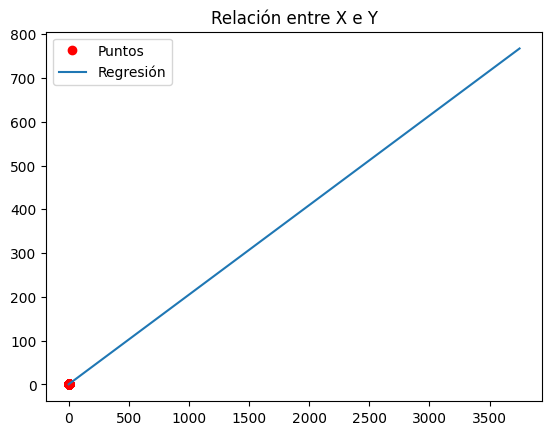

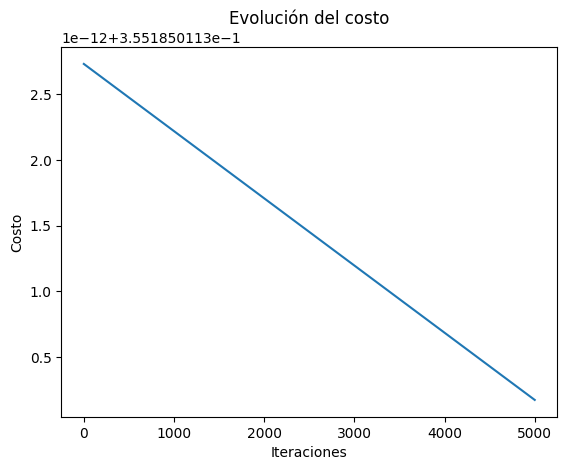

In [99]:


# Gráfico de puntos y regresión
plt.plot(X, Y, 'ro', label='Puntos')
plt.plot(xm, ym, label='Regresión')
plt.title('Relación entre X e Y')
plt.legend() # añade la leyenda
plt.show()

# Gráfico de costo
plt.plot(costos)
plt.title('Evolución del costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()


In [101]:
def validacion(X, y, k, reg, cost, grad, a=0.1, n=1000, degree=1):
    scores = []
    temp_size = len(X) // k
    for i in range(k):
        X_test = X[i * temp_size:(i + 1) * temp_size]
        X_test_poly = np.power(X_test, degree)
        X_test_poly = np.column_stack((np.ones_like(X_test), X_test_poly))
        y_test = y[i * temp_size:(i + 1) * temp_size]
        X_train = np.concatenate([X[:i * temp_size], X[(i + 1) * temp_size:]])
        X_train_temp = np.power(X_train, degree) 
        y_train = np.concatenate([y[:i * temp_size], y[(i + 1) * temp_size:]])

        Xr = np.column_stack((np.ones_like(X_train), X_train_temp))
        theta_0 = np.random.rand(Xr.shape[1],1)
        theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

        t, g = reglogistica(Xr, y_train, theta_0, cost, grad, a=a, n=n)

        score = cost(X_test_poly, y_test, t)
        scores.append(score)

    promediado = np.mean(scores)
    return promediado


X_shuffled.shape
Y_shuffled.shape
np.zeros(X_train.shape[1])

     
res = []
tempAlfa = 0.1
for i in range(1,11):
    tempAlfa = tempAlfa / 1000000000000000
    average = validacion(X_shuffled, Y_shuffled, k=3, reg=reglogistica, cost=cost, grad=grad, a=tempAlfa, n=1000, degree=i)
    res.append(average)
    print(f"Promedio con el polinomio testeado {i} es {average}")     

Promedio con el polinomio testeado 1 es 0.398990769673252
Promedio con el polinomio testeado 2 es 0.41926039060500203
Promedio con el polinomio testeado 3 es 0.375495866462268
Promedio con el polinomio testeado 4 es 0.37764559383912744
Promedio con el polinomio testeado 5 es 0.37917932553495626
Promedio con el polinomio testeado 6 es 0.36470875071708875
Promedio con el polinomio testeado 7 es 0.4066743200683678
Promedio con el polinomio testeado 8 es 0.36268995594680825
Promedio con el polinomio testeado 9 es 0.38814643335634313
Promedio con el polinomio testeado 10 es 0.44105683197767265
